<a href="https://colab.research.google.com/github/MahimaRamireddy/MahimaRamireddy.github.io/blob/main/Titanic%20DataSet%20Analysis/titanic_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic Dataset Analysis

In [56]:
# import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
#loading titanic data set
titanic_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv')

#statistics of numerical data
print(titanic_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
#check for null values
print(titanic_df.isnull().sum())

#remove duplicates
titanic_df.drop_duplicates(inplace=True)




PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
dtype: int64


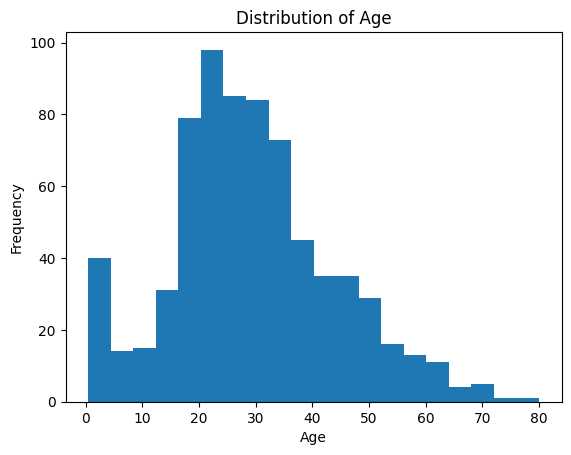

In [ ]:
# preprocessing 'Age' column
plt.hist(titanic_df['Age'].dropna(), bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Since the distribution of age is normal distribution. hence missing values in age column should be replaced with mean()
mean_age = titanic_df['Age'].mean()
titanic_df['Age'].fillna(mean_age, inplace=True)

In [ ]:
#preprocessing 'Cabin' column
# Since 'Cabin' is categorical data we replace the missing values with most frequent value
most_frequent_cabin = titanic_df['Cabin'].mode()[0]
titanic_df['Cabin'].fillna(most_frequent_cabin, inplace=True)

In [ ]:
# preprocessing 'Embarked column'
# Since we have only 2 missing values in 'Embarked column' we can just drop them
titanic_df.dropna(subset=['Embarked'], inplace=True)


In [ ]:
#check for null values again
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
AgeGroup       177
dtype: int64


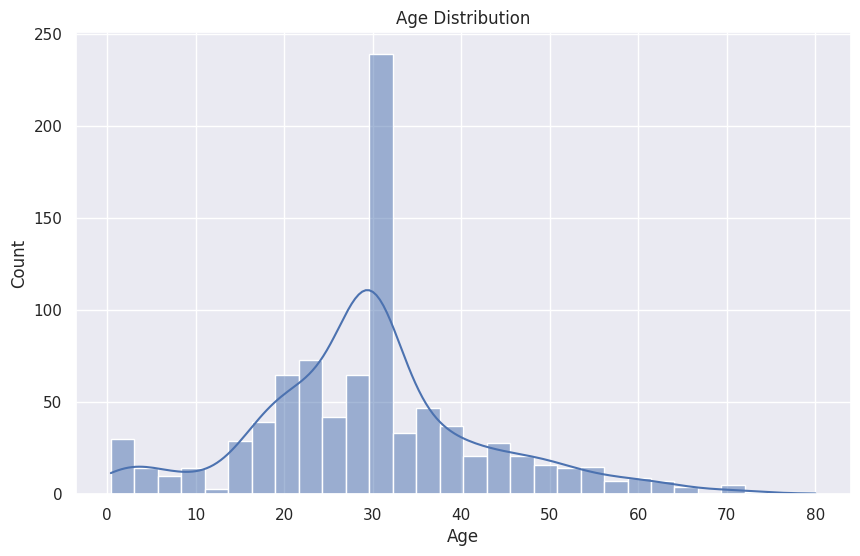

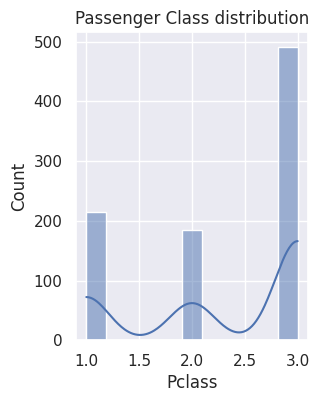

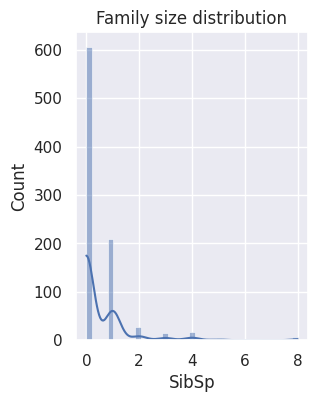

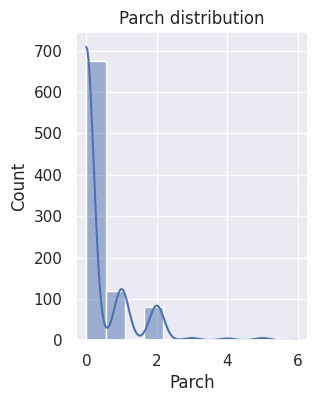

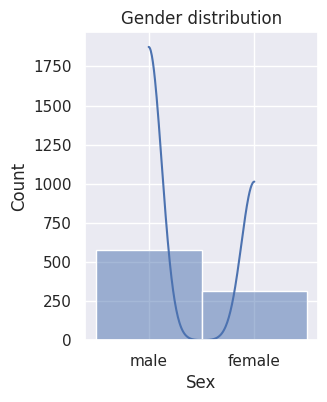

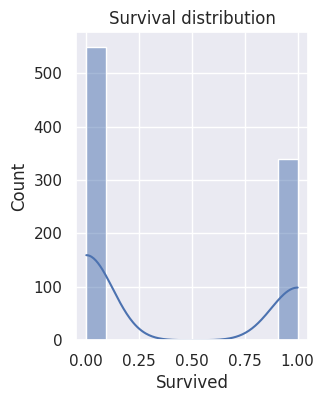

In [47]:
# age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x="Age", kde=True)
plt.title("Age Distribution")
plt.show()

# passenger class distribution
plt.figure(figsize=(3, 4))
sns.histplot(data=titanic_df, x="Pclass", kde=True)
plt.title("Passenger Class distribution")
plt.show()

# distribution by size of family(spouse/siblings)
plt.figure(figsize=(3, 4))
sns.histplot(data=titanic_df, x="SibSp", kde=True)
plt.title("Family size distribution")
plt.show()

#distribution by parch
plt.figure(figsize=(3, 4))
sns.histplot(data=titanic_df, x="Parch", kde=True)
plt.title("Parch distribution")
plt.show()

#distribution by gender
plt.figure(figsize=(3, 4))
sns.histplot(data=titanic_df, x="Sex", kde=True)
plt.title("Gender distribution")
plt.show()

#distribution by survival
plt.figure(figsize=(3, 4))
sns.histplot(data=titanic_df, x="Survived", kde=True)
plt.title("Survival distribution")
plt.show()



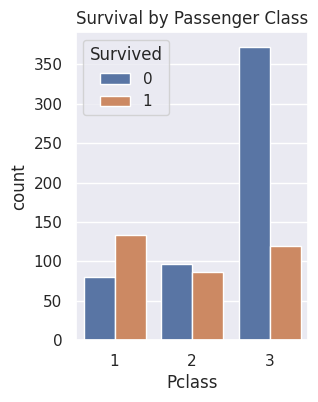

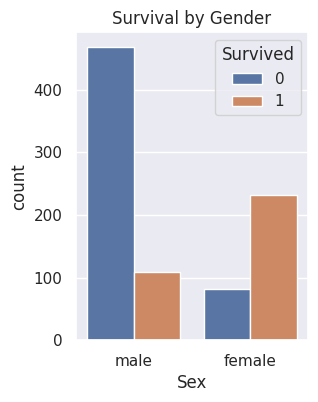

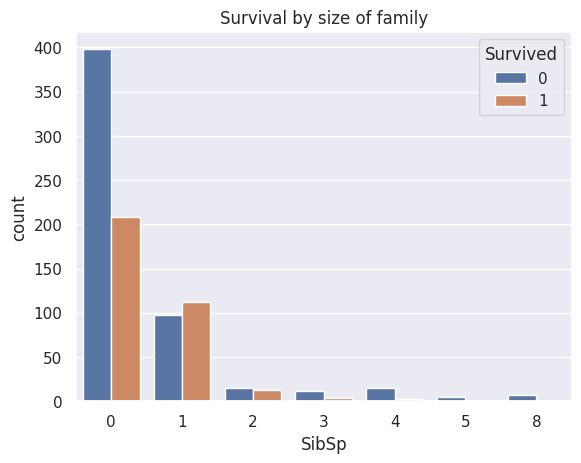

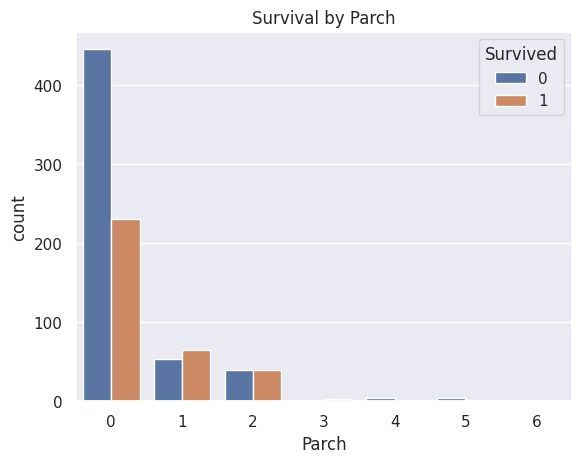

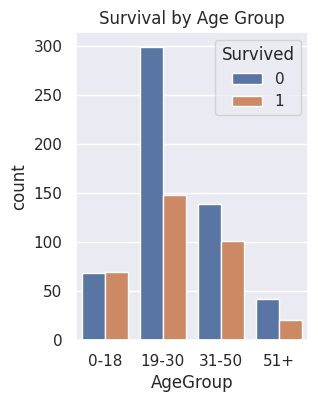

In [49]:
#survival by passenger class
plt.figure(figsize=(3, 4))
sns.countplot(x="Pclass", hue="Survived", data=titanic_df)
plt.title("Survival by Passenger Class")
plt.show()

#survival by gender
plt.figure(figsize=(3, 4))
sns.countplot(x="Sex", hue="Survived", data=titanic_df)
plt.title("Survival by Gender")
plt.show()

#survival by family size
sns.countplot(x="SibSp", hue="Survived", data=titanic_df)
plt.title("Survival by size of family")
plt.show()

#survival by parch
sns.countplot(x="Parch", hue="Survived", data=titanic_df)
plt.title("Survival by Parch")
plt.show()

#survival by  age distribution
age_bins = [0, 18, 30, 50, 100]
age_labels = ['0-18', '19-30', '31-50', '51+']

titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(3, 4))
sns.countplot(x="AgeGroup", hue="Survived", data=titanic_df)
plt.title("Survival by Age Group")
plt.show()


<ipython-input-50-b4faec6da335>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic_df.corr()


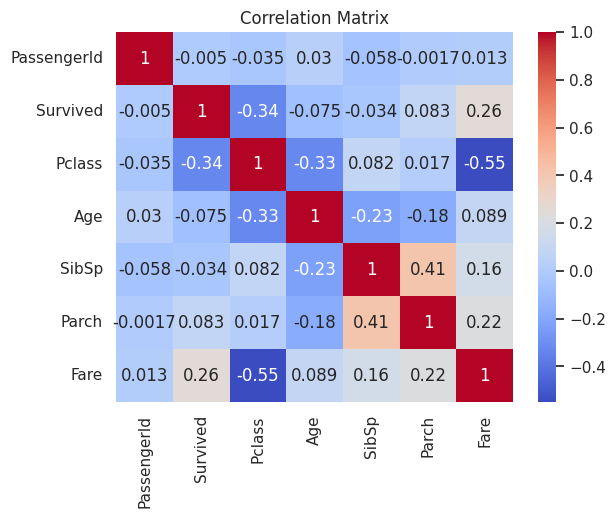

In [50]:
# Correlation matrix
correlation_matrix = titanic_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [55]:
# Grouping data by passenger class and calculating the mean age
mean_age_by_class = titanic_df.groupby('Pclass')['Age'].mean()
print("Mean Age by Passenger Class:")
print(mean_age_by_class)

print("\n")

# Grouping data by passenger class and calculating the survival rate
survival_rate_by_pclass = titanic_df.groupby('Pclass')['Survived'].mean()
print("Survival Rate by passenger class:")
print(survival_rate_by_pclass)

print("\n")

# Grouping data by gender and calculating the survival rate
survival_rate_by_gender = titanic_df.groupby('Sex')['Survived'].mean()
print("Survival Rate by Gender:")
print(survival_rate_by_gender)

print("\n")


# Grouping data by age group and calculating the survival rate
survival_rate_by_age = titanic_df.groupby('AgeGroup')['Survived'].mean()
print("Survival Rate by Age group:")
print(survival_rate_by_age)



Mean Age by Passenger Class:
Pclass
1    36.927073
2    29.866958
3    26.403259
Name: Age, dtype: float64


Survival Rate by passenger class:
Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Survival Rate by Gender:
Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64


Survival Rate by Age group:
AgeGroup
0-18     0.503597
19-30    0.331096
31-50    0.420833
51+      0.333333
Name: Survived, dtype: float64


####1. Descriptive Statistics:

The describe() method provides statistical summaries for numerical columns. The "mean" value for the 'Age' column, which was imputed with the mean age, tells us that the average age of passengers on the Titanic was approximately 29.699 yrs. The "standard deviation" provides a measure of the spread or variation in ages. The "minimum" and "maximum" values give the range of ages in the dataset, revealing that passengers' ages range from 0.42 to 80 yrs. These statistics help us understand the central tendency and spread of passenger ages.


####2. Missing Data Handling:

The decision to replace missing 'Age' values with the mean age was based on the assumption that it's a reasonable estimate for the missing ages. By using the mean, we aimed to minimize the impact on the distribution of ages. On the other hand, missing 'Cabin' values were filled with the most frequent value because it's a categorical variable, and this approach helps maintain the most common category.


####3. Age Distribution:

The histogram and KDE plot for age reveal that most passengers on the Titanic were in their early 20s to early 30s. The distribution is right-skewed, indicating that there were fewer elderly passengers. The KDE plot provides a smooth representation of the age distribution, showing the peak in the early 20s, which corresponds to a higher density of passengers in that age group.


####4. Survival and Passenger Class:

The countplot displaying survival by passenger class shows that first-class passengers had a higher chance of survival, followed by second-class passengers, and third-class passengers had the lowest survival rate. This suggests a strong relationship between passenger class and survival, likely due to the prioritization of lifeboats for higher-class passengers.



####5. Survival and Gender:

The countplot depicting survival by gender demonstrates that female passengers had a significantly higher survival rate compared to male passengers. This might be attributed to the "women and children first" policy during the evacuation.


####6. Survival by Family Size and Parch:

In the visualizations related to family size and Parch, we can observe that passengers traveling with one or more family members (spouse/siblings or parents/children) tended to have higher survival rates. This may indicate that traveling with family members increased the likelihood of survival, possibly due to assistance or support during the evacuation.


####7. Age Group Analysis:

The age group analysis shows that children (0-18) had a relatively higher survival rate compared to other age groups, while the 19-30 age group had a lower survival rate. This could be due to the "women and children first" policy, where children were prioritized during the evacuation.


####8. Correlation Matrix:

The correlation matrix heatmap reveals that the strongest negative correlation is between 'Pclass' and 'Survived,' indicating that higher-class passengers had a better chance of survival. The 'Fare' variable shows a positive correlation with 'Survived,' suggesting that passengers who paid higher fares had a higher chance of survival. The heatmap provides insights into the relationships between different variables and their impact on survival.